In [1]:
import ROOT as rt
import sys
import os
import Plotting as plot
sys.path.append(os.getcwd())
from quantileRegression import quantileRegression, setupJoblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib inline
#reload(plt)
plt.style.use('seaborn-talk')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)



Welcome to ROOTaaS 6.06/08


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
n_jobs=30
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [3]:
# Upload Dataframes:
periods=[1,2,3,4,5]
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  9554789 ]  out of  9554789
number of events: 9554789
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Final.h5
Selecting events   [ 0 ,  9554789 ]  out of  9554789
number of events: 9554789
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Final.h5
Selecting events   [ 0 ,  19216524 ]  out of  19216524
number of events: 19216524


In [4]:
qr_mc1.correctAll(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_") 
qr_mc2.correctAll(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_") 
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
qr_mc= quantileRegression("mc")
qr_mc.df = data2.reset_index() 

Loading corrected targets from :  correctedTargetsweights_Period_1_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_1_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_2_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_3_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_4_EE.h5
Loading corrected targets from :  correctedTargetsweights_Period_5_EE.h5


In [5]:
%time qr_mc.correctPhoIso("../phoIsoStoch/corrections_hybrid.root",n_jobs=n_jobs)

Computing corrected photon isolation using /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/../phoIsoStoch/corrections_hybrid.root


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    4.8s remaining:  1.2min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:    5.4s remaining:   36.3s
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:    5.6s remaining:   23.5s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:    6.0s remaining:   17.2s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:    6.3s remaining:   13.3s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:    6.7s remaining:   10.6s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:    7.2s remaining:    8.8s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:    7.5s remaining:    7.0s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:    8.0s remaining:    5.7s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:    8.0s remaining:    4.4s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:    8.7s remaining:    3.6s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 3.62 s, sys: 6.39 s, total: 10 s
Wall time: 13.4 s


In [6]:
qr_mc.df.index.size

9543155

In [7]:
dfmc     = qr_mc.getDF()

In [10]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4']

mvas = [ ("moriondPhoID",dict(correct=[], rhoSubtraction=True) ), 
("moriondPhoIDcorrShowerShapes",dict(correct=showerShapes, rhoSubtraction=True) ),
("moriondPhoIDcorrIso",dict(correct=['PhoIso03'],rhoSubtraction=True)),
("moriondPhoIDcorrAll",dict(correct=showerShapes+['PhoIso03'], rhoSubtraction=True)) ] 

weights = ("./phoIDMVAweights/HggPhoId_barrel_Moriond2017_wRhoRew.weights.xml","./phoIDMVAweights/HggPhoId_endcap_Moriond2017_wRhoRew.weights.xml")

In [13]:
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )

Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:  6.1min
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:  6.2min remaining: 89.4min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:  6.4min remaining: 43.0min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:  6.4min remaining: 26.7min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  6.7min remaining: 19.1min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed: 11.6min remaining: 24.3min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed: 11.8min remaining: 18.7min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed: 12.0min remaining: 14.6min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed: 12.3min remaining: 11.5min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed: 12.3min remaining:  8.9min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed: 12.4min remaining:  6.8min
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed: 12.4min remaining:  5.1min
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 4.85 s, sys: 7.34 s, total: 12.2 s
Wall time: 12min 48s
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:  2.0min remaining: 29.7min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:  2.2min remaining: 15.1min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:  3.4min remaining: 14.2min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  3.9min remaining: 11.3min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  4.1min remaining:  8.6min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  4.5min remaining:  7.1min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  4.6min remaining:  5.6min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  4.7min remaining:  4.4min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  4.7min remaining:  3.4min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  4.9min remaining:  2.7min
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  5.0min remaining:  2.0min
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrShowerShapes, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:  2.6min remaining: 38.1min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:  2.8min remaining: 19.0min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:  3.0min remaining: 12.4min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  3.1min remaining:  8.9min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  3.4min remaining:  7.2min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  3.5min remaining:  5.5min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  3.7min remaining:  4.5min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  3.9min remaining:  3.7min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  4.3min remaining:  3.1min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  4.6min remaining:  2.5min
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  4.7min remaining:  1.9min
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrIso, correcting {'rhoSubtraction': True, 'correct': ['PhoIso03']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:  2.7min remaining: 38.6min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:  2.8min remaining: 19.0min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:  3.1min remaining: 12.8min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  3.3min remaining:  9.6min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  3.7min remaining:  7.8min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  3.9min remaining:  6.2min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  4.2min remaining:  5.1min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  4.2min remaining:  4.0min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  4.5min remaining:  3.2min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  4.5min remaining:  2.5min
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  4.5min remaining:  1.8min
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrAll, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'PhoIso03']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:  2.4min
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:  2.4min remaining: 34.8min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:  2.7min remaining: 18.5min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:  2.8min remaining: 11.7min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  2.8min remaining:  8.2min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  3.1min remaining:  6.4min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  3.9min remaining:  6.2min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  4.3min remaining:  5.2min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  4.4min remaining:  4.2min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  4.5min remaining:  3.2min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  4.6min remaining:  2.5min
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  4.6min remaining:  1.9min
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 15.3 s, sys: 46.6 s, total: 1min 1s
Wall time: 21min 19s


In [19]:
dfmc['moriondPhoIDcorr']=dfmc['moriondPhoIDcorrAll']
dfmc['idCorr'] = dfmc['moriondPhoID'] - dfmc['moriondPhoIDcorr']
dfmc['idCorrIso'] = dfmc['moriondPhoID'] - dfmc['moriondPhoIDcorrIso']
dfmc['idCorrShowerShapes'] = dfmc['moriondPhoID'] - dfmc['moriondPhoIDcorrShowerShapes']
dfmc['absScEta'] = np.abs(dfmc['ScEta'])


In [20]:
dfEB   = dfdata  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfEE   = dfdata  .query('(ScEta < -1.57 or ScEta >1.57)  and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and (ChIso03 < 5)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')

Plotting.py:52: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if axes == None: axes = fig.axes


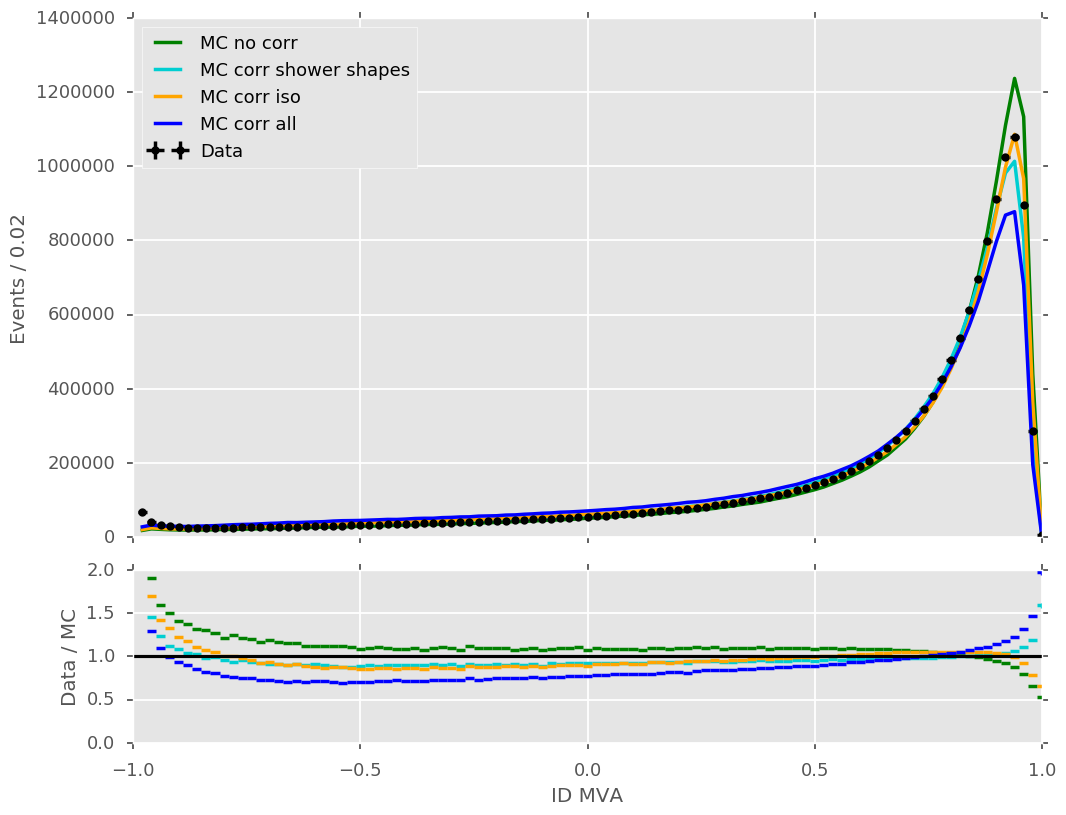

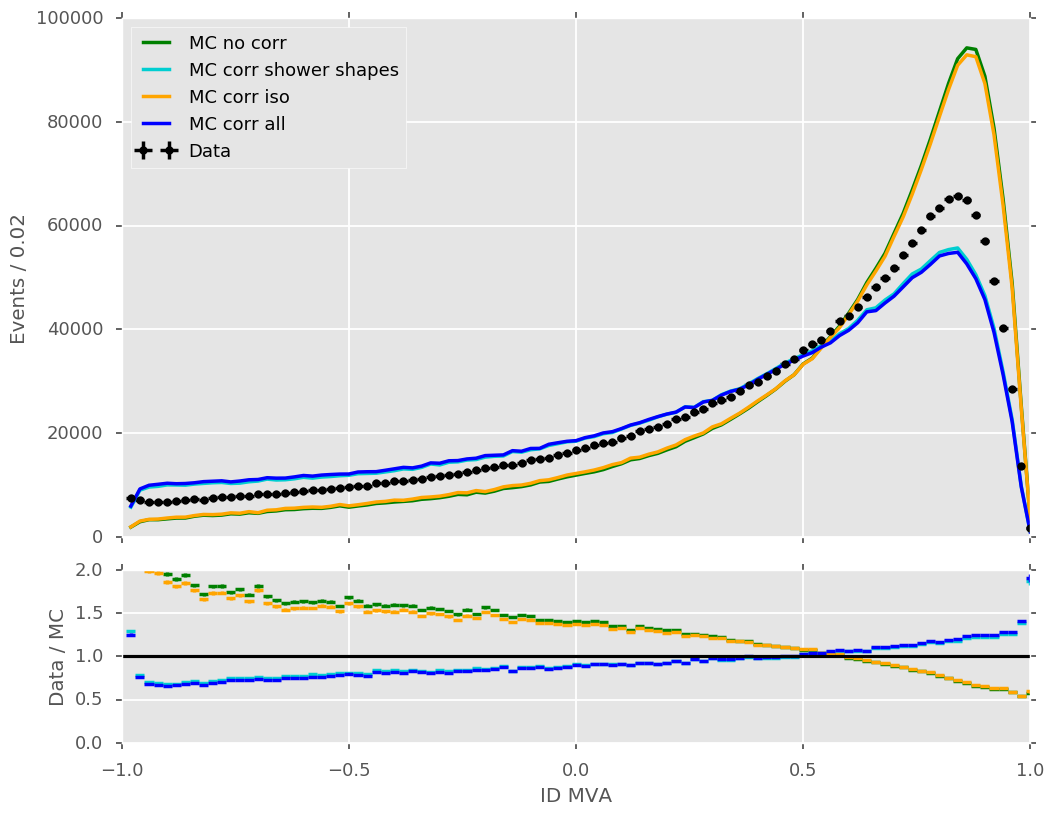

In [21]:
bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
mclabels = [ '', 'corrShowerShapes', 'corrIso', 'corr' ]
mcstyles = [ dict(label='MC no corr',color='green'), 
             dict(label='MC corr shower shapes',color='darkturquoise'), 
             dict(label='MC corr iso',color='orange'),
             dict(label='MC corr all',color='blue'), 
           ]

for dfs in [ (dfEB,dfmcEB), (dfEE,dfmcEE) ]: 
    data, mc = plot.data_mc(dfs[0],dfs[1],var,bins,mclabels=mclabels)
    plot.draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=True, figsize=(10,8))
#     with plt.xkcd()
#         draw_data_mc(bins, data, zip(mc,mcstyles), var='ID MVA', alpha=1, linewidth=2, ratio=True, figsize=(10,8))
